## Split Training Data to Smaller Images

In [21]:
import os
from PIL import Image
import numpy as np
from shutil import rmtree

IMG_PATH = "train/images/"
TARGET_PATH = "train/targets/"
OUTPUT_PATH = "output/"
ORIG_SIZE = (1024, 1024)
OUTPUT_SIZE = (256, 256)

if not os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)
    os.mkdir(OUTPUT_PATH + 'pre/')
    os.mkdir(OUTPUT_PATH + 'post/')
    os.mkdir(OUTPUT_PATH + 'pre/images/')
    os.mkdir(OUTPUT_PATH + 'pre/masks/')
    os.mkdir(OUTPUT_PATH + 'post/images/')
    os.mkdir(OUTPUT_PATH + 'post/masks/')
"""
else:
    rmtree(OUTPUT_PATH)
    os.mkdir(OUTPUT_PATH)
    os.mkdir(OUTPUT_PATH + 'pre/')
    os.mkdir(OUTPUT_PATH + 'post/')
    os.mkdir(OUTPUT_PATH + 'pre/images/')
    os.mkdir(OUTPUT_PATH + 'pre/masks/')
    os.mkdir(OUTPUT_PATH + 'post/images/')
    os.mkdir(OUTPUT_PATH + 'post/masks/')
"""
# get the list of images
images_path = os.listdir(IMG_PATH)
images_path = [(IMG_PATH + x) for x in images_path if (('pre' in x or 'post' in x) and 'earthquake' in x)]
#images_path = [(IMG_PATH + x) for x in images_path]

# get the list of targets
targets_path = os.listdir(TARGET_PATH)
targets_path = [(TARGET_PATH + x) for x in targets_path if (('pre' in x or 'post' in x) and 'earthquake' in x)]
#targets_path = [(TARGET_PATH + x) for x in targets_path]

print(len(images_path))

242


In [22]:
from tqdm import tqdm

output_pre_index = 0
output_post_index = 0

# splt image to tiles
def tile_image(image, size):
    tiles = []
    for x in range(image.shape[0] // size[0]):
        for y in range(image.shape[1] // size[1]):
            top = size[0] * x
            left = size[1] * y

            bottom = top + size[0]
            right = left + size[1]
            
            #print(f"{top_left}, {bottom_right}")
            tiles.append(image[top:bottom, left:right])
    return tiles

for img_path, tgt_path in tqdm(tuple(zip(images_path, targets_path))):
    image = np.array(Image.open(img_path))
    target = np.array(Image.open(tgt_path))

    tiled_image = tile_image(image, OUTPUT_SIZE)
    tiled_targets = tile_image(target, OUTPUT_SIZE)

    for tile_img, tile_tgt in tuple(zip(tiled_image, tiled_targets)):
        if ('pre' in img_path):
            img_output_path = OUTPUT_PATH + 'pre/' + 'images/' + str(output_pre_index) + '.png'
            target_output_path = OUTPUT_PATH + 'pre/' + 'masks/' + str(output_pre_index) + '.png'

            Image.fromarray(tile_img).save(img_output_path)
            Image.fromarray(tile_tgt).save(target_output_path)

            output_pre_index += 1

        elif ('post' in img_path):
            img_output_path = OUTPUT_PATH + 'post/' + 'images/' + str(output_post_index) + '.png'
            target_output_path = OUTPUT_PATH + 'post/' + 'masks/' + str(output_post_index) + '.png'

            Image.fromarray(tile_img).save(img_output_path)
            Image.fromarray(tile_tgt).save(target_output_path)

            output_post_index += 1

100%|██████████| 242/242 [06:01<00:00,  1.49s/it]


***

1036.png 1036.png 1036.png 1036.png


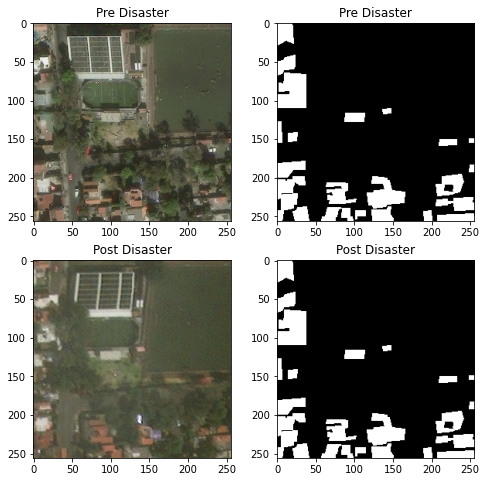

In [23]:
# test load for random image
import matplotlib.pyplot as plt
from random import randint

images1 = os.listdir(OUTPUT_PATH + 'pre/images/')
images2 = os.listdir(OUTPUT_PATH + 'post/images/')
targets1 = os.listdir(OUTPUT_PATH + 'pre/masks/')
targets2 = os.listdir(OUTPUT_PATH + 'post/masks/')

idx = randint(0, len(images1))

print(images1[idx], targets1[idx], images2[idx], targets2[idx])
img1 = np.array(Image.open(OUTPUT_PATH + 'pre/images/' + images1[idx]))
mask1 = np.array(Image.open(OUTPUT_PATH + 'pre/masks/' + targets1[idx]))
img2 = np.array(Image.open(OUTPUT_PATH + 'post/images/' + images2[idx]))
mask2 = np.array(Image.open(OUTPUT_PATH + 'post/masks/' + targets2[idx]))

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.title('Pre Disaster')
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.title('Pre Disaster')
plt.imshow(mask1[:,:,np.newaxis], 'gray')
plt.subplot(2, 2, 3)
plt.title('Post Disaster')
plt.imshow(img2)
plt.subplot(2, 2, 4)
plt.title('Post Disaster')
plt.imshow(mask2[:,:,np.newaxis], 'gray')
plt.show()